# Dependencias y Dataframe 

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Abrir un archivo y explorarlo
#rodriguez\\Fernando\\Querys\\indicadores de transaccionalidad
#%cd C:\\Users\\frodriguez\\Fernando\\Querys\\archivos\\indicadores de transaccionalidad
#%cd C:\\Users\\frodriguez\\Fernando\\Notebooks
#%cd C:\\Users\\frodriguez\\Desktop\\Archivos más usados\\indicadores de transaccionalidad
#%cd C:\\Users\\frodriguez\\Google Drive\\Prevencion de fraude\\Prevención transaccional\\Gestion de area
#%cd C:\\Users\\frodriguez\\Google Drive\\Fernando personal
#df = pd.read_csv('sample_df.csv')
df = sns.load_dataset('iris')
#df.describe()
print(df.shape)
df.head(1)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
#Montarse a Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#Ubicarse en el working directory de Google Drice
%cd /content/gdrive/My\ Drive/Fernando\ personal

/content/gdrive/My Drive/Fernando personal


In [ ]:
df = pd.read_csv('sample_df.csv')

In [ ]:
df.head()

,merchant_id,merchant_name,tck_max_s_post,ticket_max_usd_post,gpv_usd_post,fraud_usd_post,trx_vol_post,fraud_trx_post,chb_usd_post,ret_usd_post,tck_max_s_pre,ticket_max_usd_pre,gpv_usd_pre,fraud_usd_pre,trx_vol_pre,fraud_trx_pre,chb_usd_pre,ret_usd_pre
0,1,CISMO,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0,0.0,0.0
1,2,LUKANA!,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0,0.0,0.0
2,3,FIGHTER STORE,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0,0.0,0.0
3,4,YUPILOO,0.0,0.0,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0,0.0,0.0
4,5,VALEGAS GOURMET,199.0,0.0,143.939394,0.0,5,0,0.0,0.0,597.0,0.0,2522.121212,0.0,39,0,0.0,0.0


# CLASSES

## Class cdf

### Código

In [ ]:
class cdf():
    '''Class made to analyze the cumulative distribution of a series.

    Dependencies needed: pandas, numpy, matplotlib.pyplot
    ---
    Created by Fernando A. Rodríguez
    GitHub:/fernandogatohub
    LinkedIn:/feraru
    '''

    def __init__(self, df,column_to_analyze,df_name = 'default'):
        """Set a DataFrame and column to be used in the cdf class functions 
    
        Args:
            df(pandas dataframe object): a dataframe that contains the column
                to be analyzed as a cumulative distribution
            column_to_analyze(str): the column to be analyzed
            df_name(str,optional): the dataframe's name that will be displayed
                when calling the functions
        """
        self.df = df
        self.column_to_analyze = column_to_analyze
        self.df_name = df_name
        self.plot_title = 'Cumulative Distribution Plot'
        self.show_q_values_title = 'Values Found for a List of Cumulative Probabilities'
        self.show_p_values_title = 'Cumulative Probabilities Found for a List of Values'
        self.full_report_title = 'Full Cumulative Distribution Report'
        
    def create_qp_df(self):
        """Create a DataFrame of values (q) and its cumulative probabilities (p)
            
        Returns:
            Pandas DataFrame
        """
        ordered_index = np.arange(0,len(self.df)).astype(int) 
        global q
        q = self.df.sort_values(by=self.column_to_analyze).set_index(ordered_index)[self.column_to_analyze]
        global p
        p = pd.Series((ordered_index + 1)/len(self.df))
        global qp_df 
        qp_df = pd.DataFrame({'q':q,'p':p})
        return qp_df

    def output_title(self, function_name = 'default'):
        """Print a function's title. This function is created to be called
          in next functions.
            
        Args:
            function_name(str,optional)
        """
        print('{}'.format(function_name))
        print('DataFrame: {}'.format(self.df_name))
        print('Column: {}'.format(self.column_to_analyze))

    def plot(self, cdf_x_label = 'q',cdf_y_label = 'p', 
                plot_title = True):
        """Plot the cumulative distribution of selected column
        
        Args:
            cdf_x_label(str,optional): Label for the x axis
            cdf_y_label(str,optional): Label for the y axis
            plot_title(bool): True if you want the tutle to be plotted
            
        Returns:
            matplotlib.pyplot plot
        """
        function_name = self.plot_title
        self.create_qp_df()
        if plot_title is True:
            self.output_title(function_name)
        plt.plot(q,p,marker='.',linestyle='none')
        plt.xlabel(cdf_x_label)
        plt.ylabel(cdf_y_label)
        plt.margins(0.02)
        return plt.show()
    
    def find_y(self,source_x,df,x_col_name,y_col_name):
        """Find the value in column y for a given value in column x of
                a given DataFrame. This function is created to be called
                in next functions.
        
        Args:
            source_x(float): value in column 'x'
            df(pandas dataframe object): the DataFrame containging columns x and y
            x_col_name(str): name of the column that will be treated as x
            y_col_name(str): name of the column that will be treated as y
            
        Returns:
            float
        """
        def find_min(source_x1,df1,x_col_name1,mutable_colname):
            fmin = df1[df1[x_col_name1] <= source_x1]
            fmin = fmin.sort_values(by=[mutable_colname],ascending=False).reset_index()
            fmin = fmin.loc[0,mutable_colname]
            return fmin
        def find_max(source_x1,df1,x_col_name1,mutable_colname):
            fmax = df1[df1[x_col_name1] >= source_x1]
            fmax = fmax.sort_values(by=[mutable_colname],ascending=True).reset_index()
            fmax = fmax.loc[0,mutable_colname]
            return fmax
        ymin = find_min(source_x,df,x_col_name,y_col_name)
        xmin = find_min(source_x,df,x_col_name,x_col_name)
        ymax = find_max(source_x,df,x_col_name,y_col_name)
        xmax = find_max(source_x,df,x_col_name,x_col_name)
        if xmin == source_x:
          found_y = ymin
        elif xmax == source_x:
          found_y = ymax
        else:
          found_y = ymax
        #elif xmax == source_x:
        #  found_y = ymax
        #else:
        #  yminw = (xmax-source_x)/(xmax-xmin)
        #  ymaxw = (source_x-xmin)/(xmax-xmin)
        #  found_y = (ymin*yminw)+(ymax*ymaxw)
        return found_y
    
    def find_q(self,p):
        """Find a value given a cumulative probability
        
        Args:
            p(float): must be major to 0 and minor or equal to 1
        
        Returns:
            float
        """
        self.create_qp_df()
        found_q = self.find_y(p,qp_df,'p','q')
        return found_q
        
    def find_p(self,q):
        """Find a cumulative probability given a value 
        
        Args:
            q(float)
        
        Returns:
            float
        """
        self.create_qp_df()
        found_p = self.find_y(q,qp_df,'q','p')
        return found_p

    def find_y_list(self,source_x1_list,df1,x_col_name1,mutable_colname):
        """Display a list of values in column y for a given list of values in column x
            of a given DataFrame. This function is created to be called in next functions.   
        
        Args:
            source_x1_list(Python list): list containing the x values
            df1(pandas dataframe object):DataFrame containging columns x and y
            x_col_name1(str): name of the column that will be treated as x
            mutable_colname(str): name of the column that will be treated as y 

        Returns:
            Pandas DataFrame
        """
        found_y_list = []
        for i in source_x1_list:
            found_y_list.append(self.find_y(i,df1,x_col_name1,mutable_colname))
        dictionariex = {'x':source_x1_list,'y':found_y_list}
        df = pd.DataFrame.from_dict(dictionariex)
        return df

    def show_q_list(self,source_p_list = 'default',q_header='q',p_header='p',
                       plot_title = True):
        """Display a list of values given a list of cumulative probabilities 
        
        Args:
            source_p_list(Python list): numbers in the list
                must be major to 0 and minor or equal to 1
            q_header(str,optional): header of the values column
            p_header(str,optional): header of the probabilities column
            plot_title(bool,optional): True if you want to display the function title
        
        Returns:
            Pandas DataFrame
        """
        function_name = self.show_q_values_title
        if plot_title is True:
            self.output_title(function_name)
        self.create_qp_df()
        if source_p_list == 'default':
            source_p_list = [0.999,0.975,0.950,0.900]
        df = self.find_y_list(source_p_list,qp_df,'p','q') 
        df.rename(columns={'y':q_header,'x':p_header}, inplace=True)
        return df

    def show_p_list(self,source_q_list,q_header='q',p_header='p',
                       plot_title = True):
        """Display a list of cumulative probabilities  given a list of values 
        
        Args:
            source_q_list(Python list)
            q_header(str,optional): header of the values column
            p_header(str,optional): header of the probabilities column
            plot_title(bool,optional): True if you want to display the function title
        
        Returns:
            Pandas DataFrame
        """
        function_name = self.show_p_values_title
        if plot_title is True:
            self.output_title(function_name)
        self.create_qp_df()
        df = self.find_y_list(source_q_list,qp_df,'q','p')
        df.rename(columns={'x':q_header,'y':p_header}, inplace=True)
        return df 

    def full_report(self, source_q_list, source_p_list = 'default',
                         cdf_x_label = 'q',cdf_y_label = 'p'):
        """Display the full CDF report
        
         Args:
            source_q_list(Python list)
            source_p_list(Python list,optional): numbers in the list
                must be major to 0 and minor or equal to 1
            cdf_x_label(str,optional): Label for the x axis of the CDF plot
            cdf_y_label(str,optional): Label for the y axis of the CDF plot
        """
        function_name = self.full_report_title
        self.output_title(function_name)
        print('---''\n')
        print(self.plot_title)
        self.plot(cdf_x_label,cdf_y_label,False)
        print('\n')
        print(self.show_q_values_title)
        display(self.show_q_list(source_p_list,cdf_x_label,cdf_y_label,False))
        print('\n')
        print(self.show_p_values_title)
        display(self.show_p_list(source_q_list,cdf_x_label,cdf_y_label,False))

### Ejemplos

In [ ]:
cc = cdf(qr_day,'N_INTENTOS',df_name = 'qr_day')

In [ ]:
cc.create_qp_df()

,q,p
0,1,0.000001
1,1,0.000002
2,1,0.000003
3,1,0.000004
4,1,0.000005
...,...,...
934955,172,0.999996
934956,183,0.999997
934957,376,0.999998
934958,401,0.999999


Cumulative Distribution Plot
DataFrame: qr_day
Column: N_INTENTOS


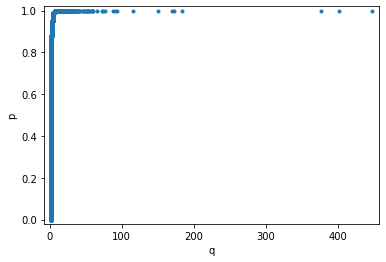

In [ ]:
cc.plot(cdf_x_label = 'q',cdf_y_label = 'p', plot_title = True)

In [ ]:
cc.find_p(40)

0.9999647043723796

In [ ]:
cc.find_q(0.999)

12

In [ ]:
cc.show_q_list(source_p_list = 'default',q_header='N_INTENTOS',p_header='%Clientes',plot_title = True)

Values Found for a List of Cumulative Probabilities
DataFrame: qr_day
Column: N_INTENTOS


,%Clientes,N_INTENTOS
0,0.999,12
1,0.975,4
2,0.950,4
3,0.900,3


In [ ]:
cc.show_p_list(source_q_list = [100,50,25,10,5],q_header='N_INTENTOS',p_header='%Clientes',plot_title = True)

Cumulative Probabilities Found for a List of Values
DataFrame: qr_day
Column: N_INTENTOS


,N_INTENTOS,%Clientes
0,100,0.999993
1,50,0.999973
2,25,0.999883
3,10,0.998550
4,5,0.987563


Full Cumulative Distribution Report
DataFrame: qr_day
Column: N_INTENTOS
---

Cumulative Distribution Plot


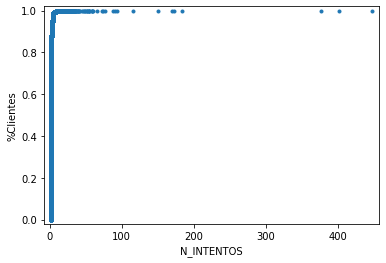



Values Found for a List of Cumulative Probabilities


,%Clientes,N_INTENTOS
0,0.999,12
1,0.975,4
2,0.950,4
3,0.900,3




Cumulative Probabilities Found for a List of Values


,N_INTENTOS,%Clientes
0,100,0.999993
1,50,0.999973
2,25,0.999883
3,10,0.998550
4,5,0.987563


In [ ]:
cc.full_report([100,50,25,10,5], source_p_list = 'default',cdf_x_label = 'N_INTENTOS',cdf_y_label = '%Clientes')

## Class pmf

In [ ]:
class pmf():
  def __init__(self,df,x):
    self.df = df
    self.x = x
      
  def create_pmf_df(self):
    global pmf_df
    pmf_df = pd.DataFrame(self.df[self.x].value_counts(dropna=False)).reset_index()
    pmf_df.columns = ['column','q']
    lenght = pmf_df.q.sum()
    pmf_df['probability'] = pmf_df.q/lenght
    return pmf_df
  
  def plot(self,kind='percentage'):
    self.create_pmf_df()
    if kind == 'percentage':
      plot = sns.lineplot(data=pmf_df,x='column',y='probability')
    else:
      plot = sns.lineplot(data=pmf_df,x='column',y='q')
    return plot

# FUNCTIONS

In [ ]:
#@title output_guides
import datetime as dt
from IPython.display import Audio
from IPython.core.display import display

#While not created yet
ex_date = dt.datetime.now()
print('   >>> '+str(ex_date))

def og(op_type='exec_time',df_list=None, df_rows=1,message=None,division=None,hours_delta=0,sound=None):
    """Display the chosen type of output guide

    Args:
        op_type(str,optional): name of the output type to display
        df_list(list,optional): list of Dataframes
        df_rows(int or str,optional): number of rows to be displayed from all DataFrame
        message(str, optional): message to display
        division(str, optional): string that will be printed at the end as division
        hours_delta(int, optional): number of hours that will be shifted to system date
        sound(bool,optional): sound to play
    """
    try:
        global og_start
        global og_last
        sound_dir = "C:\\Users\\frodriguezu\\Fernando\\system"

        def ex_at_str():
            ex_date = dt.datetime.now() + dt.timedelta(hours=hours_delta)
            return '   >>> '+str(ex_date)

        def exec_time():
            print(ex_at_str())

        def get_name(df):
            for x in globals():
                if globals()[x] is df:
                    name = x
            return name

        def created_df(df_list,df_rows):
            names_list = []
            for df in df_list:
                name = get_name(df)
                names_list.append(name)
            for (name,df) in zip(names_list,df_list):
                if df_rows == 'all':
                    df_rows = df.shape[0]
                print(name)
                print(str(df.shape)+ex_at_str())
                display(df.head(df_rows))

        if message != None: print(message)
        if op_type == 'exec_time': 
            og_last = dt.datetime.now() + dt.timedelta(hours=hours_delta)
            exec_time()
        elif op_type == 'created_df': 
            og_last = dt.datetime.now() + dt.timedelta(hours=hours_delta)
            created_df(df_list,df_rows)
        elif op_type == 'start': og_start = dt.datetime.now() + dt.timedelta(hours=hours_delta)
        elif op_type == 'rt_from_start':
            og_last = dt.datetime.now() + dt.timedelta(hours=hours_delta)
            rt = dt.datetime.now() + dt.timedelta(hours=hours_delta) - og_start
            print(ex_at_str()+' ({})'.format(rt))
        elif op_type == 'rt_from_last':
            rt = dt.datetime.now() + dt.timedelta(hours=hours_delta) - og_last
            print(ex_at_str()+' ({})'.format(rt))
            og_last = dt.datetime.now() + dt.timedelta(hours=hours_delta)
        else: print('A correct optput type has not been specified')
        if sound == None: next
        else: display(Audio(filename=sound_dir+'\\'+sound, autoplay=True))
        if division != None: print(division)
    except:
        print('Excecution was completed but something went wrong when trying to show the output guide')

In [ ]:
#@title copy_df

def copy_df(names_dict=None,nnames=None,onames=None,delete=False):
    global nnames_list
    nnames_list = []
    if names_dict is not None:
        onames = list(names_dict.keys())
        nnames = list(names_dict.values())
    for oname, nname in zip(onames,nnames):
        program = \
            'global {},{}\n'.format(nname,oname)\
            +'{} = pd.DataFrame({},copy=True)\n'.format(nname,oname)\
            +'nnames_list.append({})\n'.format(nname)\
            +'if delete == True:\n\tdel {}'.format(oname)
        exec(program)

# PRUEBAS

In [ ]:
#l = [0,1,2,3,4,5,6,7,8,9,10]
#df = pd.DataFrame(data=l,columns=['x'])
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
